In [1]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv
import matplotlib
load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)

from src.data.dimensionality_reduction.HCF.main_HCR import pipe_line_data
from src.dst.outputhandler.pickle import pickle_save_,pickle_load
from src.models.LSTM.conf_LSTM import return_dict_bounds
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

## Utilization Contours

In [89]:
dict_c,bounds        = return_dict_bounds()
# for key,value in zip(dict_c.keys(),dict_c.values()):
#     print(key,value)

MOVING PICTURES
BGS
Peak derivation
True
Scaler
PCA


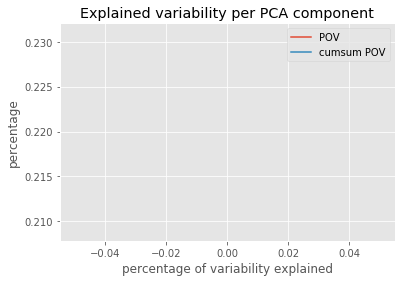

In [91]:
dict_c,bounds            = return_dict_bounds()

dict_c['resolution']     = 2
dict_c['tracker']        = True
dict_c['PCA_components'] = 1

dict_c['nr_contours']    = 8
PL                       = pipe_line_data(dict_c)
df                       = PL.peak_derivation()

In [92]:
array = np.concatenate(list(df['data_p']), axis = 0)
# array = df.iloc[2]['data_p'][3:5]

total_nr_contours = array.shape[0]*array.shape[1]/12.

contour = dict_c['nr_contours']
slices  = int(array.shape[1]/(dict_c['nr_contours']*3))
total_nr_contours = array.shape[0]*slices

print('nr_contours           : ',contour)
print('slices                : ',slices)
print('total_nr_contours     : ',total_nr_contours)

dict_count = {}
for i in range(contour):
    dict_count[i] = 0




for sample in array:
    for i in range(slices):
        for j in range(contour):
            if(sample[12*i+3*j] != 0. or  sample[12*i+3*j+1] != 0. or sample[12*i+2+3*j] != 0.):
                dict_count[j] += 1 


            else:
                pass
        
        
print(dict_count)


print(array.shape)
print(total_nr_contours)

for key in dict_count.keys():
    dict_count[key] = dict_count[key]/total_nr_contours
values = []
for key in dict_count.keys():
    values.append(dict_count[key])
    
values = sorted(values,reverse = True)

nr_contours           :  8
slices                :  90
total_nr_contours     :  6946560
{0: 1741164, 1: 497257, 2: 100675, 3: 13703, 4: 1801198, 5: 520147, 6: 108231, 7: 14854}
(77184, 2160)
6946560


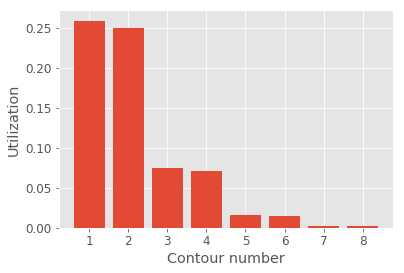

In [95]:

import matplotlib
matplotlib.rcParams.update({'font.size': 12})
plt.bar(np.arange(1,contour+1,1),values)
plt.xlabel('Contour number')
plt.ylabel('Utilization')
plt.savefig('./plots/AFE/utilization.png',bbox_inches="tight")

## Difference between resolutions

MOVING PICTURES
BGS
Peak derivation
True
Scaler
PCA
(2160, 77184)
nr_contours           :  4
slices                :  180
total_nr_contours     :  388800
MOVING PICTURES
BGS
Peak derivation
True
Scaler
PCA
(1080, 77184)
nr_contours           :  4
slices                :  90
total_nr_contours     :  97200
MOVING PICTURES
BGS
Peak derivation
True
Scaler
PCA
(720, 77184)
nr_contours           :  4
slices                :  60
total_nr_contours     :  43200
MOVING PICTURES
BGS
Peak derivation
True
Scaler
PCA
(540, 77184)
nr_contours           :  4
slices                :  45
total_nr_contours     :  24300
MOVING PICTURES
BGS
Peak derivation
True
Scaler
PCA
(432, 77184)
nr_contours           :  4
slices                :  36
total_nr_contours     :  15552
MOVING PICTURES
BGS
Peak derivation
True
Scaler
PCA
(360, 77184)
nr_contours           :  4
slices                :  30
total_nr_contours     :  10800
MOVING PICTURES
BGS
Peak derivation
True
Scaler
PCA
(312, 77184)
nr_contours           :  

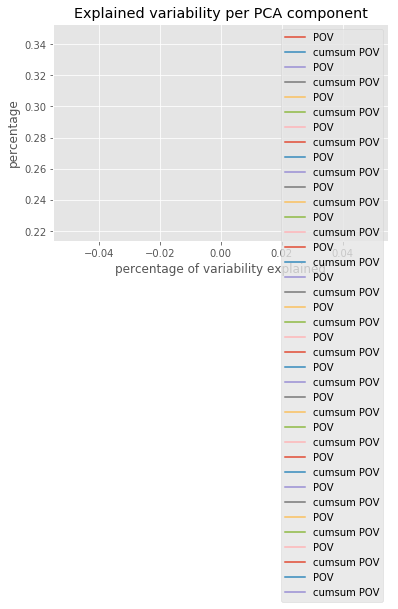

In [2]:
dict_ = {}

for res in range(1,20):
    


    dict_c,bounds            = return_dict_bounds()

    dict_c['resolution']     = res
    dict_c['tracker']        = True
    dict_c['PCA_components'] = 1

    dict_c['nr_contours']    = 4
    PL                       = pipe_line_data(dict_c)
    df                       = PL.peak_derivation()

    array = np.concatenate(list(df['data_p']), axis = 0)
    array = array.reshape((array.shape[1],array.shape[0]))
    print(array.shape)

    contour = dict_c['nr_contours']
    slices  = int(array.shape[0]/(dict_c['nr_contours']*3))
    total_nr_contours = array.shape[0]*slices

    print('nr_contours           : ',contour)
    print('slices                : ',slices)
    print('total_nr_contours     : ',total_nr_contours)


    diff = []
    for i in range(slices-1):
        tmp1 = array[:][12*i:12*i+12]
        tmp2 = array[:][12*i+12:12*i+24]


        diff.append(np.mean(np.square(np.power(tmp1-tmp2,2))))

    
    
    dict_[res] = np.mean(diff)


{1: 0.043189721106484134,
 2: 0.04698256636900156,
 3: 0.04684019123802312,
 4: 0.04388275935389097,
 5: 0.036930560293775845,
 6: 0.051824419566649016,
 7: 0.04649370028618972,
 8: 0.04307925824596365,
 9: 0.042613678193607944,
 10: 0.03564472434606087,
 11: 0.04450173064112689,
 12: 0.045408687045376775,
 13: 0.04052894297417978,
 14: 0.04315394895860114,
 15: 0.03487140404958074,
 16: 0.03596922927449614,
 17: 0.04402892172185753,
 18: 0.045279487089521925,
 19: 0.046535142914327796}

###  show diff between tracker and no tracker

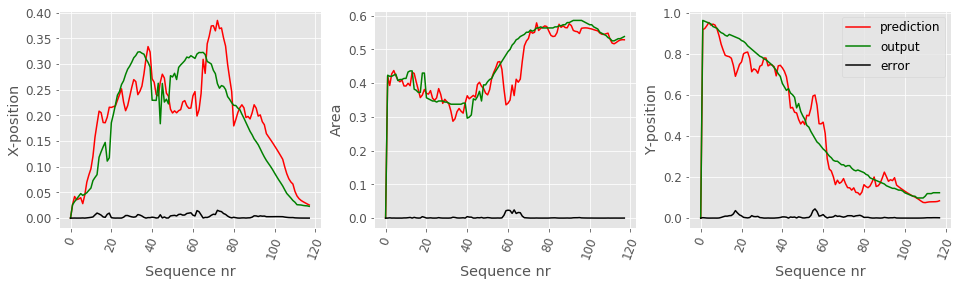

In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
path = './plots/AFE/True.p'
j,feature, output_A, pred_A, error_A, output_y, pred_y, error_y, output_x, pred_x, error_x = pickle_load(path,None)


fig = plt.figure(figsize=(16, 4))


output_A = output_A[:-3]
pred_A   = pred_A[:-3]
error_A  = error_A[:-3]
output_y = output_y[:-3]
pred_y   = pred_y[:-3]
error_y  = error_y[:-3]
output_x = output_x[:-3]
pred_x   = pred_x[:-3]
error_x  = error_x[:-3]


ax = plt.subplot(131)
ax.plot(pred_x, label='prediction', color='red')
ax.plot(output_x, label='output', color='green')
ax.plot(error_x, color='black', label='error')
# plt.legend()
plt.xlabel('Sequence nr')
plt.ylabel('X-position')

plt.xticks(rotation=70)

ax = plt.subplot(132)
ax.plot(pred_A, label='prediction', color='red')
ax.plot(output_A, label='output', color='green')
ax.plot(error_A, color='black', label='error')
plt.xlabel('Sequence nr')
plt.ylabel('Area')
# plt.legend()
plt.xticks(rotation=70)

ax = plt.subplot(133)
ax.plot(pred_y, label='prediction', color='red')
ax.plot(output_y, label='output', color='green')
ax.plot(error_y, color='black', label='error')
plt.xlabel('Sequence nr')
plt.ylabel('Y-position')
plt.xticks(rotation=70)
plt.legend()
plt.savefig('./plots/plots/LSTM_tracker.png',bbox_inches="tight")
plt.show()


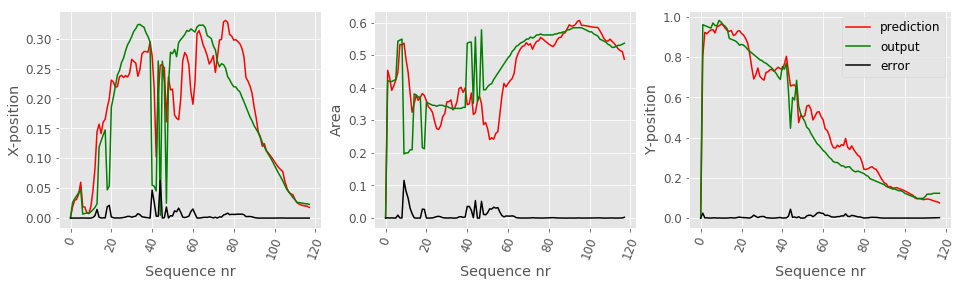

In [4]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

path = './plots/AFE/False.p'
j,feature, output_A, pred_A, error_A, output_y, pred_y, error_y, output_x, pred_x, error_x = pickle_load(path,None)


fig = plt.figure(figsize=(16, 4))


output_A = output_A[:-3]
pred_A   = pred_A[:-3]
error_A  = error_A[:-3]
output_y = output_y[:-3]
pred_y   = pred_y[:-3]
error_y  = error_y[:-3]
output_x = output_x[:-3]
pred_x   = pred_x[:-3]
error_x  = error_x[:-3]


ax = plt.subplot(131)
ax.plot(pred_x, label='prediction', color='red')
ax.plot(output_x, label='output', color='green')
ax.plot(error_x, color='black', label='error')
# plt.legend()
plt.xlabel('Sequence nr')
plt.ylabel('X-position')

plt.xticks(rotation=70)

ax = plt.subplot(132)
ax.plot(pred_A, label='prediction', color='red')
ax.plot(output_A, label='output', color='green')
ax.plot(error_A, color='black', label='error')
plt.xlabel('Sequence nr')
plt.ylabel('Area')
# plt.legend()
plt.xticks(rotation=70)

ax = plt.subplot(133)
ax.plot(pred_y, label='prediction', color='red')
ax.plot(output_y, label='output', color='green')
ax.plot(error_y, color='black', label='error')
plt.xlabel('Sequence nr')
plt.ylabel('Y-position')
plt.xticks(rotation=70)
plt.legend()
plt.savefig('./plots/plots/LSTM_no_tracker.png',bbox_inches="tight")
plt.show()
